# Pymaceuticals Inc.
---

### Analysis

#### Overview
The experiment was performed on 249 mise. Analysis was performed on the 248 testing records (1 mouse testing result it was excluded from the analysis dues to wrong entry).  
51% of the mice were Males and 49% - Females. 
The data was collected form the test results of 10 different regimens:
- Capomulin,
- Ceftamin,
- Infubinol,
- Ketapril,
- Naftisol,
- Placebo,
- Propriva,
- Ramicane,
- Stelasyn,
- Zoniferol.
The number of observed Mouse Timepoints vary for different regimens (see chart1).

#### Capomulin Results

For the mice treated with Capomulin there is strong correlation between mouse weight and the average tumor volume - 84%.
The more the Weight is, the bigger the Average Tumor Volume. 

#### Observations for Mouse ID l509
Mouse ID l509 was treated with Capomulin.
Over 45 Mouse timepoints the TUmor Volume reduced by 8% from 45 mm3 to 41.38 mm3.



In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_results_compl = pd.merge(study_results,mouse_metadata, on= ["Mouse ID","Mouse ID"], how="left")

# Display the data table for preview
study_results_compl.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice.
study_results_compl["Mouse ID"].nunique()

249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = study_results_compl[study_results_compl.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_info = study_results_compl[study_results_compl["Mouse ID"].isin(duplicate_id)]
duplicate_id_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_clean= study_results_compl.drop(study_results_compl[study_results_compl["Mouse ID"].isin(duplicate_id)].index)
study_results_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
# Checking the number of mice in the clean DataFrame.
study_results_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = study_results_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = study_results_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var = study_results_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = study_results_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = study_results_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_stats_v1 = pd.concat([regimen_mean, regimen_median, regimen_var,regimen_std,regimen_sem], 
                            axis=1, 
                            keys=["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."])
regimen_stats_v1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_stats = study_results_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"]})
regimen_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [35]:
# Prepare data to build chart
# Calculate # of mice for each regimen type
drug_regimen = study_results_clean.groupby("Drug Regimen").size().sort_values(ascending = False)

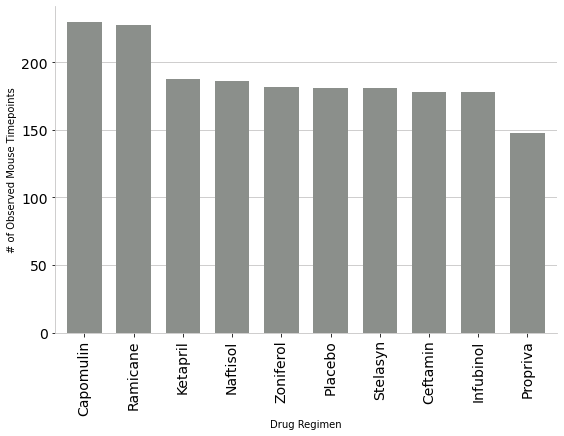

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regiment_chart = drug_regimen.plot (kind='bar', 
                                        width= 0.7,
                                        color='#8b8f8b', 
                                        xlabel='Drug Regimen',
                                        ylabel='# of Observed Mouse Timepoints',
                                        figsize= (9,6),
                                        fontsize= 14,
                                        zorder=2
                                        )

# Remove borders
drug_regiment_chart.spines[['top', 'right']].set_visible(False)

# Change color of the axis
drug_regiment_chart.spines[['bottom','left']].set_color('#c4c2c2')

# Add gridlines
plt.grid(axis='y', color='#c4c2c2', zorder=1)


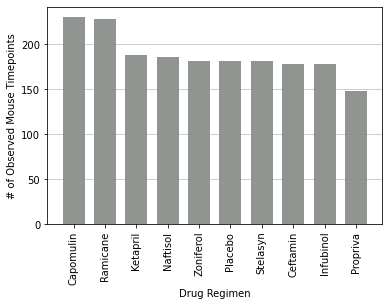

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen.index, drug_regimen.values, width= 0.7, color= '#8b8f8b', alpha= 0.95,zorder=2)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.grid(axis='y', color='#c4c2c2', zorder=1)

plt.show()

In [38]:
# Prepare data to build chart
# Calculate ratio between male and female
mice_sex = study_results_clean.groupby("Sex").size().sort_values(ascending = False)

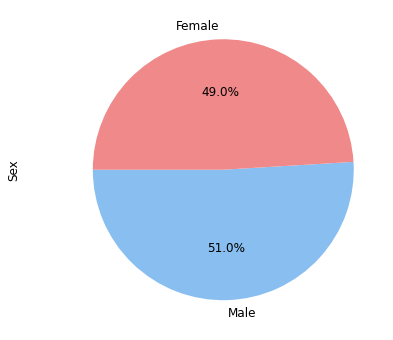

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_chart = mice_sex.plot (kind='pie', 
                                autopct='%1.1f%%', 
                                startangle=180,
                                ylabel="Sex",
                                fontsize= 12,
                                figsize= (6,6),
                                colors=['#89bef0', '#f08989']
                                )
mice_sex_chart.set_ylabel("Sex", labelpad=40, fontsize= 12)

# Adjust background colour
plt.gcf().set_facecolor('white')


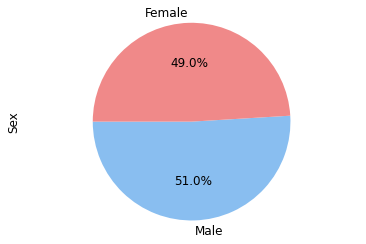

<Figure size 432x432 with 0 Axes>

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex, 
        labels= mice_sex.index, 
        colors= ['#89bef0', '#f08989'], 
        autopct="%1.1f%%", 
        startangle=180,
        textprops={'fontsize': 12}
       )
plt.axis("equal")
plt.ylabel("Sex", fontsize=12)
plt.figure(figsize=(6, 6)) 

plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last (greatest) timepoint for each mouse
last_timepoint = study_results_clean.groupby("Mouse ID")['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
study_results_final_volume = pd.merge(last_timepoint, study_results_clean, on=['Mouse ID', 'Timepoint'], how='inner')
study_results_final_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_list = study_results_final_volume.loc[study_results_final_volume['Drug Regimen'] == regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volumes.append(treatment_list)
    
    # Determine outliers using upper and lower bounds
    # Calculate the IQR
    quartiles = treatment_list.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
  
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    regimen_outliers = treatment_list.loc[(treatment_list < lower_bound) |
                        (treatment_list > upper_bound)]
    print(f"{regimen}'s potential outliers: {regimen_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


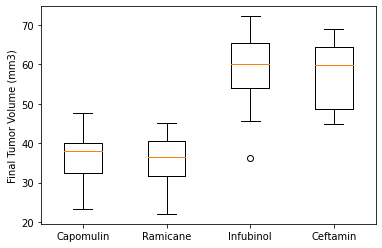

In [43]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volumes, labels = regimens_list)
plt.show()


## Line and Scatter Plots

In [44]:
# Prepare data to build chart
# Filter data for Capomulin results for mouse ID l509
capomulin_results_l509 = study_results_clean[(study_results_clean["Drug Regimen"] == "Capomulin") 
                                            & (study_results_clean["Mouse ID"] == "l509")]


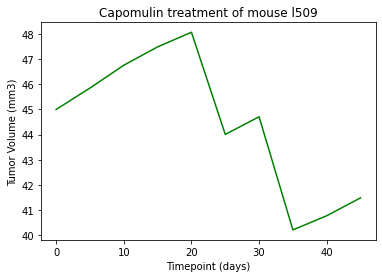

In [45]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x = capomulin_results_l509['Timepoint']
y = capomulin_results_l509['Tumor Volume (mm3)']

plt.plot(x,y,color='g')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

In [46]:
# Prepare data to build chart
# Filter data for Capomulin results
capomulin_results = study_results_clean[(study_results_clean["Drug Regimen"] == "Capomulin")]

#Calculate Average tumore Volume for each mouse treated with Capomulin
capomulin_tumor_AVG = capomulin_results.groupby("Mouse ID").mean("Tumor Volume (mm3)")

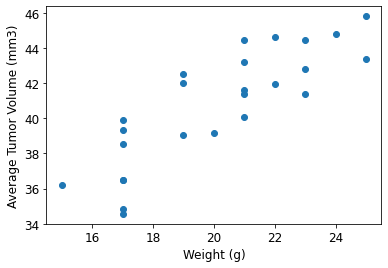

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x = capomulin_tumor_AVG["Weight (g)"]
y = capomulin_tumor_AVG["Tumor Volume (mm3)"]

plt.scatter(x,y)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.tick_params(axis='both', labelsize=12)

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


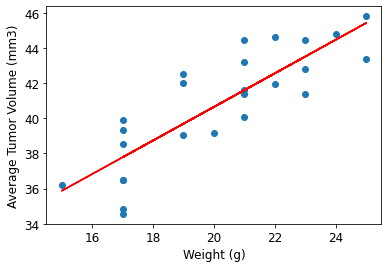

In [48]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Import library
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")

plt.show()